### Painting grids

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
import time
from IPython.display import display, clear_output

/home/rjrivarola/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Row by row

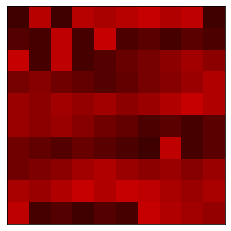

1


In [3]:
# Grid size
ROWS, COLS = 10, 10

def get_gradient(rgb1=(63, 0, 0), rgb2=(198, 0, 0), steps=20):
    """
    Creates a gradient between two colors
    Input:
        rgb1 (tuple): start color in RGB format
        rgb2 (tuple): end color in RGB format
    """
    rgb1_1, rgb1_2, rgb1_3 = rgb1
    rgb2_1, rgb2_2, rgb2_3 = rgb2
    # Start and end colors (RBG)
    start_color = np.array([rgb1_1, rgb1_2, rgb1_3]) / 255
    end_color = np.array([rgb2_1, rgb2_2, rgb2_3]) / 255

    # Generate a gradient from start to end color
    return [start_color + (end_color - start_color) * i / (steps - 1) for i in range(steps)]

gradient_colors = get_gradient() 

# Initialize grid to white
grid = np.ones((ROWS, COLS, 3))

# Cell-by-cell painting
cell_position = 0
n_reversed = 0
for i in range(ROWS):
    for j in range(COLS):
        # Randomly choose color from gradient, always start with start_color
        if i == 0 and j == 0:
            color = gradient_colors[0]
        # Jump back and forth in the color gradient
        else:
            x = random.uniform(0, 1)
            if x < 0.25:
                cell_position += -3
            elif x >= 0.25 and x < 0.5:
                cell_position += -2
            elif x >= 0.5 and x < 0.75:
                cell_position += 2
            elif x >= 0.75:
                cell_position += 3
            # Invert gradient when you get to the end of the list (either way)
            if (cell_position > (len(gradient_colors) - 1) or (cell_position < -len(gradient_colors))):
                reversed = gradient_colors[::-1]
                gradient_colors = reversed
                cell_position = 1
                n_reversed += 1
            color = gradient_colors[cell_position]

        # Paint cell
        grid[i, j] = color

        # Clear and replot
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.imshow(grid, interpolation='none')
        plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        display(fig)
        plt.close(fig)
        time
print(n_reversed)